---
### 🔹 QUESTION 1 - 1.1 Compute Travel Time

A function `calculate_travel_time(speed, distance)` that computes the travel time based on the given formula.

</div>

In [1]:
def calculate_travel_time(speed, distance):
    """Calculate travel time in hours based on speed (km/h) and distance (km)."""
    return distance / speed

# Testing formula with distance=120 and speed=60
travel_time = calculate_travel_time(speed=60, distance=120)
travel_time

2.0

---
### 🔹 1.2 Classify the Journey

Using the travel time from 1.1, I will classify the journey using conditional statements.

</div>

In [2]:
#travel_time = 2.0

def classify_journey(travel_time):
    """Classify journey based on travel time in hours."""
    if travel_time < 1:
        classification = "Short Journey"
    elif 1 <= travel_time < 3:
        classification = "Medium Journey"
    elif 3 <= travel_time < 6:
        classification = "Long Journey"
    else:
        classification = "Very Long Journey"
    
    return f"Your travel time is {travel_time} hours. This is a {classification}."

# Classify the result from 1.1
classify_journey(travel_time)

'Your travel time is 2.0 hours. This is a Medium Journey.'

---
### 🔹 QUESTION 2 – Covid-19 Data Analysis

First, loading and inspecting the `covid19_summary.csv` data file to understand the structure and assess missing values or duplicates.

---
### 🔹 2.1 Performing the appropriate data cleaning and preprocessing steps
</div>

In [3]:
import pandas as pd

# Load data
df = pd.read_csv("covid19_summary.csv")

# Check missing values
missing_values = df.isnull().sum()

# Check for duplicates
duplicates = df.duplicated().sum()

# Display results
missing_values, duplicates

(country                            0
 continent                          0
 total_confirmed                    0
 total_deaths                       8
 total_recovered                   22
 active_cases                      22
 serious_or_critical               81
 total_cases_per_1m_population      0
 total_deaths_per_1m_population     8
 total_tests                       14
 total_tests_per_1m_population     14
 population                         0
 dtype: int64,
 np.int64(0))

<div style="margin-bottom: 16px;">The dataset has:
- No duplicate rows.
- Missing values in:
  - `total_deaths`: 8
  - `total_recovered`: 22
  - `active_cases`: 22
  - `serious_or_critical`: 81
  - `total_deaths_per_1m_population`: 8
  - `total_tests`: 14
  - `total_tests_per_1m_population`: 14

Next, cleaning the data by standardizing country names (e.g., replacing “United States…” variants with “USA”).

</div>

In [4]:
# Replace variations of United States with 'USA'
df['country'] = df['country'].replace(to_replace=r'^United States.*', value='USA', regex=True)

# Remove rows with missing 'total_deaths' or 'total_confirmed' for important analysis
df_clean = df.dropna(subset=['total_confirmed', 'total_deaths']).copy()

# Ensure unique rows (by country)
df_clean = df_clean.drop_duplicates(subset=['country'])

df_clean.head()

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,179267,7690.0,162202.0,9375.0,1124.0,4420,190.0,951337.0,23455.0,40560636
1,Albania,Europe,275574,3497.0,271826.0,251.0,2.0,95954,1218.0,1817530.0,632857.0,2871945
2,Algeria,Africa,265816,6875.0,178371.0,80570.0,6.0,5865,152.0,230861.0,5093.0,45325517
3,Andorra,Europe,42156,153.0,41021.0,982.0,14.0,543983,1974.0,249838.0,3223924.0,77495
4,Angola,Africa,99194,1900.0,97149.0,145.0,NaN,2853,55.0,1499795.0,43136.0,34769277


---
### 🔹 2.2 I. Top 5 countries by confirmed cases + correlation with population

</div>

C:\Users\Admin\AppData\Local\Temp\ipykernel_16240\2185592663.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_confirmed', y='country', data=top5_confirmed, palette='viridis')


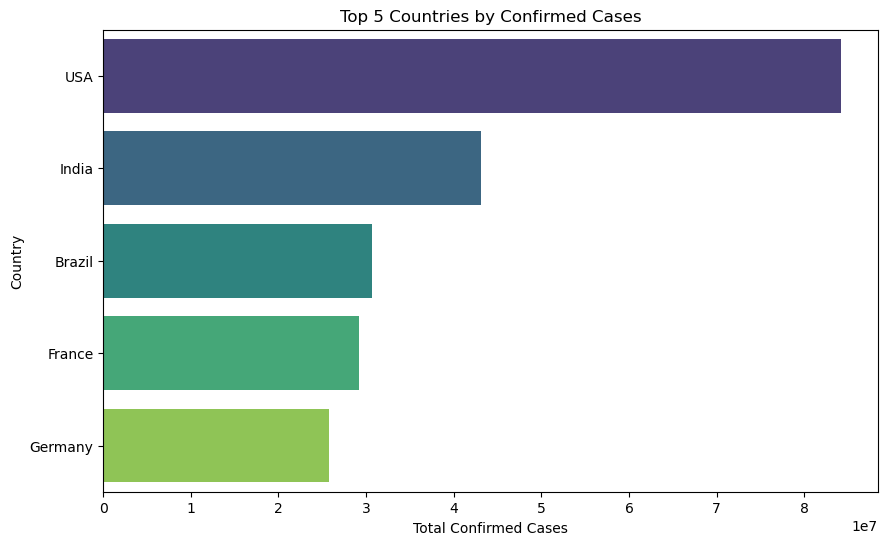

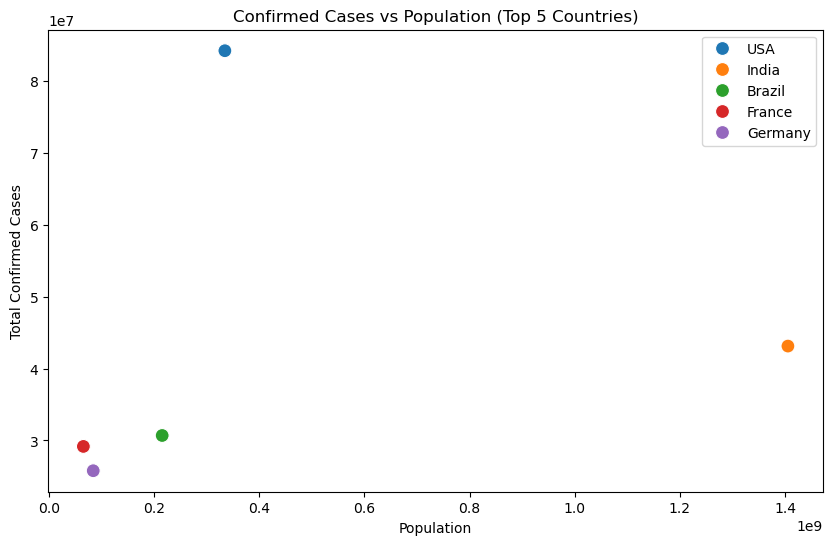

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 5 countries by confirmed cases
top5_confirmed = df_clean.nlargest(5, 'total_confirmed')

# Bar chart of total confirmed cases
plt.figure(figsize=(10,6))
sns.barplot(x='total_confirmed', y='country', data=top5_confirmed, palette='viridis')
plt.title('Top 5 Countries by Confirmed Cases')
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Country')
plt.show()

# Scatter plot of confirmed cases vs population for top 5 countries
plt.figure(figsize=(10,6))
sns.scatterplot(x='population', y='total_confirmed', data=top5_confirmed, s=100, hue='country')
plt.title('Confirmed Cases vs Population (Top 5 Countries)')
plt.xlabel('Population')
plt.ylabel('Total Confirmed Cases')
plt.legend()
plt.show()

### 🔹 2.2 II. Continent with most confirmed cases


C:\Users\Admin\AppData\Local\Temp\ipykernel_16240\3478395275.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=continent_cases.values, y=continent_cases.index, palette='plasma')


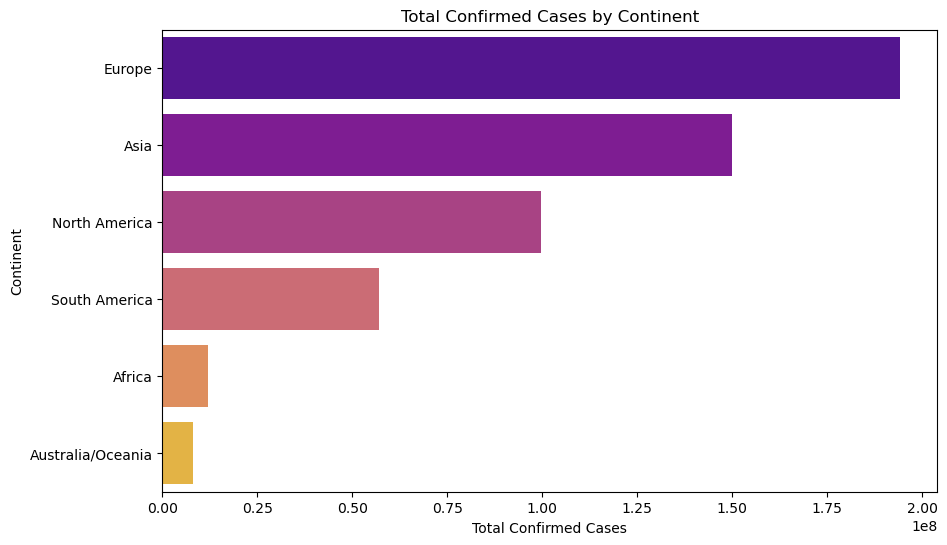

'Europe'

In [6]:
# Group by continent and sum total confirmed cases
continent_cases = df_clean.groupby('continent')['total_confirmed'].sum().sort_values(ascending=False)

# Bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=continent_cases.values, y=continent_cases.index, palette='plasma')
plt.title('Total Confirmed Cases by Continent')
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Continent')
plt.show()

# Highlight max continent
max_continent = continent_cases.idxmax()
max_continent

### 🔹 2.2 III. Top 5 countries by deaths & compare with top 5 by confirmed


C:\Users\Admin\AppData\Local\Temp\ipykernel_16240\2438515675.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='total_confirmed', y='country', data=top5_confirmed, palette='coolwarm')
C:\Users\Admin\AppData\Local\Temp\ipykernel_16240\2438515675.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x='total_deaths', y='country', data=top5_deaths, palette='coolwarm')


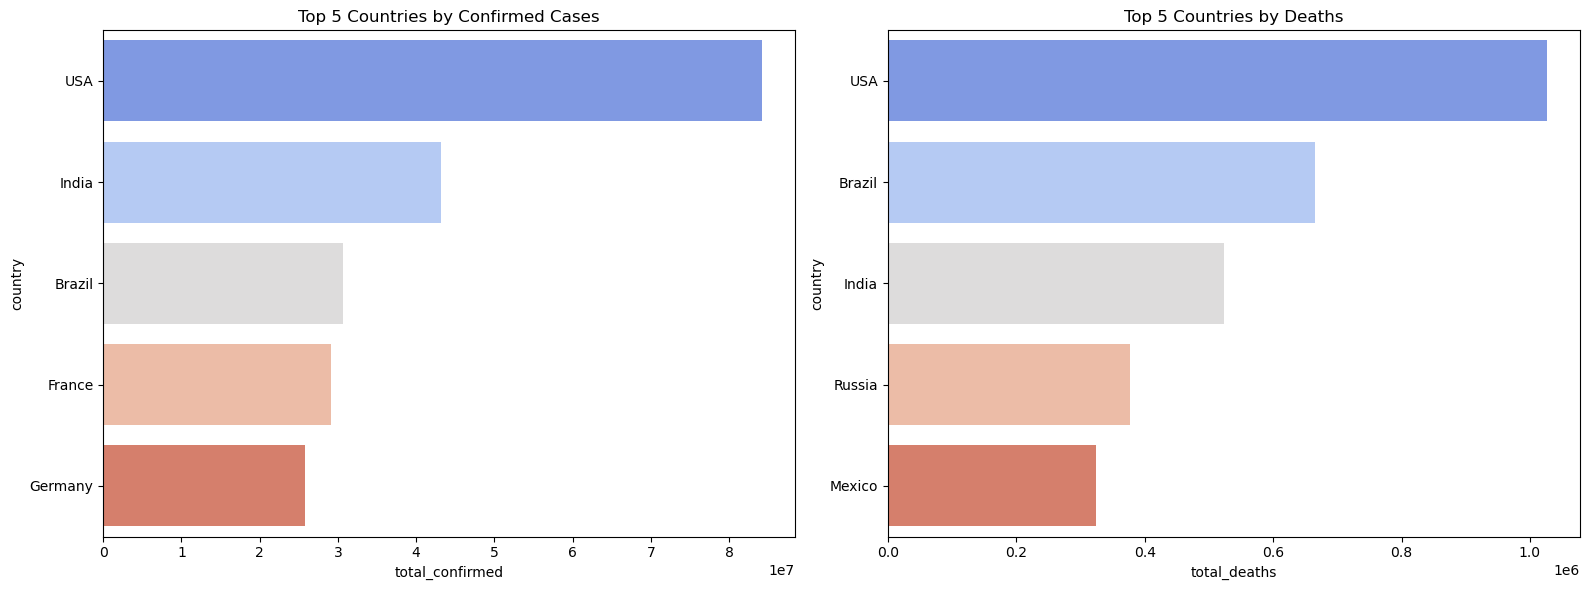

{'Top 5 Confirmed': {'Brazil', 'France', 'Germany', 'India', 'USA'},
 'Top 5 Deaths': {'Brazil', 'India', 'Mexico', 'Russia', 'USA'}}

In [7]:
# Top 5 by deaths
top5_deaths = df_clean.nlargest(5, 'total_deaths')

# Compare country names
top5_confirmed_countries = set(top5_confirmed['country'])
top5_deaths_countries = set(top5_deaths['country'])

comparison = {
    'Top 5 Confirmed': top5_confirmed_countries,
    'Top 5 Deaths': top5_deaths_countries
}

# Show both bar charts side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(ax=axes[0], x='total_confirmed', y='country', data=top5_confirmed, palette='coolwarm')
axes[0].set_title('Top 5 Countries by Confirmed Cases')

sns.barplot(ax=axes[1], x='total_deaths', y='country', data=top5_deaths, palette='coolwarm')
axes[1].set_title('Top 5 Countries by Deaths')

plt.tight_layout()
plt.show()

comparison

### 🔹 2.2 IV. Tests done in top 5 confirmed countries

C:\Users\Admin\AppData\Local\Temp\ipykernel_16240\574302570.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_tests', y='country', data=top5_tests, palette='magma')


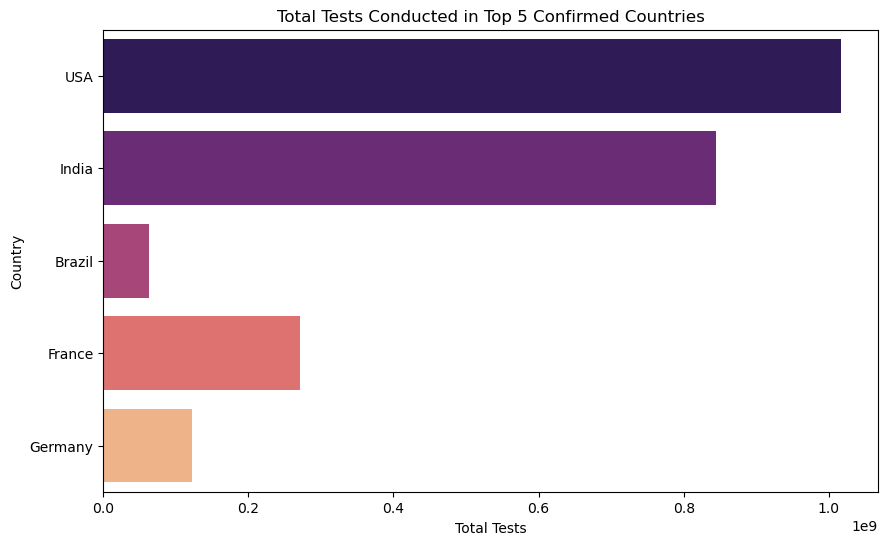

,country,total_tests
216,USA,1.016883e+09
94,India,8.438369e+08
26,Brazil,6.377617e+07
72,France,2.714902e+08
78,Germany,1.223324e+08


In [8]:
# Show total tests for top 5 confirmed countries
top5_tests = top5_confirmed[['country', 'total_tests']]

# Bar chart
plt.figure(figsize=(10,6))
sns.barplot(x='total_tests', y='country', data=top5_tests, palette='magma')
plt.title('Total Tests Conducted in Top 5 Confirmed Countries')
plt.xlabel('Total Tests')
plt.ylabel('Country')
plt.show()

top5_tests

### 🔹 2.2 V. Totals for South Africa


In [9]:
# Filter for South Africa
south_africa = df_clean[df_clean['country'] == 'South Africa'][['total_deaths', 'serious_or_critical', 'total_recovered']]

south_africa

,total_deaths,serious_or_critical,total_recovered
188,100753.0,192.0,3708347.0


### 🔹 2.2 VI. Recoveries, deaths, and serious/critical for top 5 confirmed countries

In [10]:
# Select relevant columns for top 5 confirmed countries
recovery_death_critical = top5_confirmed[['country', 'total_recovered', 'total_deaths', 'serious_or_critical']]

# Display as table
recovery_death_critical

,country,total_recovered,total_deaths,serious_or_critical
216,USA,81244260.0,1026646.0,1941.0
94,India,42579693.0,524214.0,698.0
26,Brazil,29718402.0,664920.0,8318.0
72,France,28156674.0,147257.0,1329.0
78,Germany,23956700.0,137919.0,1279.0


---
### 🔹 QUESTION 3 - 3a Components & Data Flow

Here's a breakdown of the components and data flow in a modern data architecture for Food Lovers Market:

#### **Components**:
1. **Data Sources**:
   - MySQL e-commerce database
   - JSON logs (e.g., user activity, system logs)
   - CSV delivery files (e.g., daily delivery records)
   - Excel sales reports (e.g., weekly/monthly summaries)

2. **Data Ingestion Layer**:
   - Tools and processes to collect data from the sources above.

3. **ETL / Data Processing Layer**:
   - Transform raw data into structured, clean, and consistent formats.

4. **Data Storage**:
   - **Data Lake**: Stores raw data in its native format.
   - **Data Warehouse**: Stores structured and optimized data for analytics.

5. **Analytics & BI Dashboards**:
   - Enable business insights, reporting, and decision-making.

---

#### **Data Flow**:
- Data is ingested from MySQL, JSON logs, CSVs, and Excel files.
- Ingested data is processed and cleaned (ETL).
- Clean data is stored in a **Data Lake** (raw) and/or **Data Warehouse** (structured).
- Analytics and BI dashboards query the Data Warehouse for performance reports, trends, delivery analytics, etc.

---

### 🔹 3b Technology Stack with Justification

#### **Ingestion Layer**:
- **Apache Kafka**: For real-time streaming of logs and e-commerce data.
- **AWS Glue**: For batch ingestion of CSVs and Excel reports.

#### **Storage**:
- **AWS S3**: As a scalable and cost-effective Data Lake.
- **Snowflake**: As a cloud-native Data Warehouse for fast querying.

#### **Processing**:
- **Apache Spark**: For large-scale data transformations and ETL.
- **dbt (Data Build Tool)**: For modeling and structuring data in the warehouse.

#### **Dashboard / BI**:
- **Power BI**: For interactive, user-friendly dashboards and reports.

---

### 🔹 3c Architecture Diagram

</div>

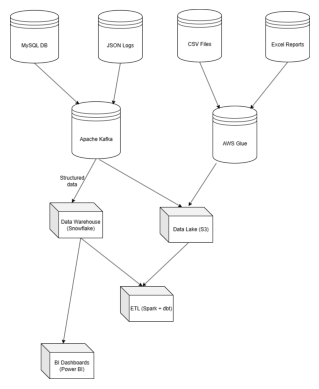

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("image.png")

plt.imshow(img)
plt.axis("off")
plt.show()

---

### 🔹 3d Sandbox Benefit

A **sandbox environment** allows data scientists to:
- Experiment with models or queries using real data without impacting production systems.
- Test ETL logic or dashboard prototypes safely.
- Validate hypotheses and improve accuracy before integrating changes into the live environment.

--- 
</div>